<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/12-ensemble-learning/03_boosting_with_gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Boosting with Gradient boosting

In this notebook, we see one of the most well-known boosting technique: **Gradient boosting**. 

Gradient boosting is similar to AdaBoost, in that the weak learners
are decision trees, and the goal of each weak learner is to learn from the mistakes of the previous
ones. 

One difference between gradient boosting and AdaBoost is that in gradient boosting, we
allow decision trees of depth more than 1. 

The idea is to continue in this fashion, calculating new residuals and training a new weak learner
to fit these residuals. 

However, there’s a small caveat—to calculate the prediction from the first two
weak learners, we first multiply the prediction of the second weak learner by the learning rate.

We do
this because we don’t want to overfit by fitting our training data too well. Our goal is to mimic the
gradient descent algorithm, by slowly walking closer and closer to the solution, and this is what we
achieve by multiplying the prediction by the learning rate. 

The new residuals are the original labels
minus the combined predictions of the first two weak learners.

##Setup

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_12_Ensemble_Methods/utils.py

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn
from sklearn import tree
import matplotlib.pyplot as plt

import utils

In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [7]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

##Dataset

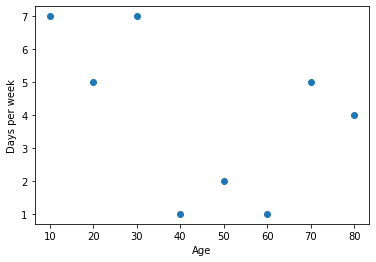

In [4]:
features = np.array([[10],[20],[30],[40],[50],[60],[70],[80]])
labels = np.array([7,5,7,1,2,1,5,4])

plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

##Decision Tree

In [5]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=2)
decision_tree_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

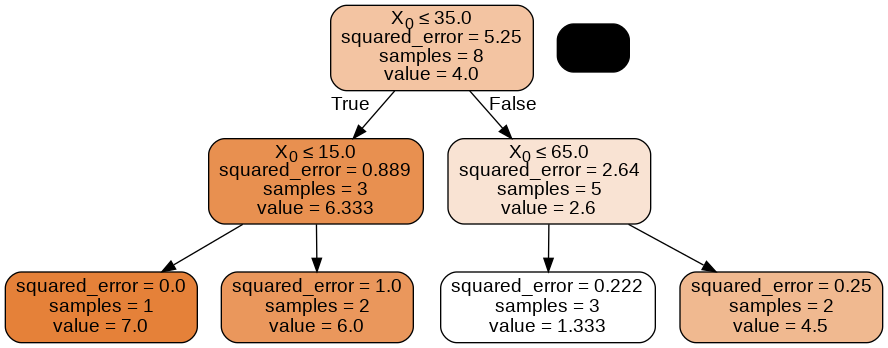

In [8]:
utils.display_tree(decision_tree_regressor)

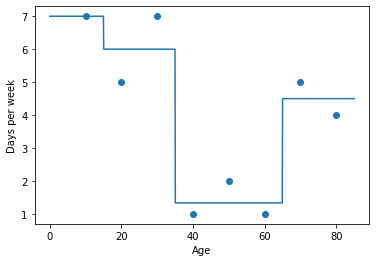

In [9]:
utils.plot_regressor(decision_tree_regressor, features, labels)

##Gradient boosting

The idea of gradient boosting is that we’ll create a sequence of trees that fit this dataset. The two
hyperparameters that we’ll use for now are the number of trees, which we set to five, and the learning rate, which we set to `0.8`. 

The first weak learner is simple: it is the decision tree of depth 0 that best fits the dataset.

The average value of the labels
of this dataset is 4, so our first weak learner is a node that assigns a prediction of 4 to every point.

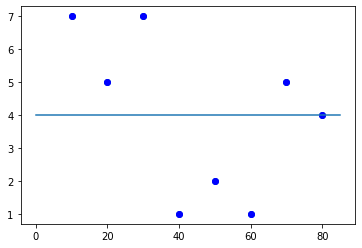

In [10]:
# First weak learner
x = np.linspace(0, 85, 2)

plt.scatter(features, labels)
plt.plot(x, [4 for i in range(len(x))])
plt.scatter(features, labels, color="blue")

The next step is to calculate the residual, which is the difference between the label and the
prediction made by this first weak learner, and fit a new decision tree to these residuals.

The second weak learner is a tree that fits these residuals. The tree can be as deep as we’d like,
but for this example, we’ll make sure all the weak learners are of depth at most 2.

In [11]:
gradient_boosting_regressor = GradientBoostingRegressor(max_depth=2, n_estimators=4, learning_rate=0.8)
gradient_boosting_regressor.fit(features, labels)
gradient_boosting_regressor.predict(features)

array([6.87466667, 5.11466667, 6.71466667, 1.43466667, 1.43466667,
       1.43466667, 4.896     , 4.096     ])

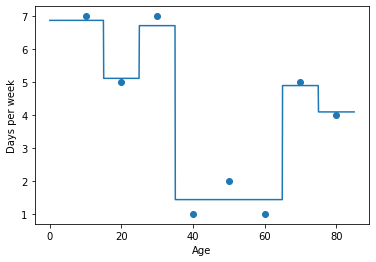

In [12]:
utils.plot_regressor(gradient_boosting_regressor, features, labels)

However, we can go a little further and actually plot the five weak learners we obtain.

Notice that the predictions of the last weak learners are much smaller than those of the first ones, because each
weak learner is predicting the error of the previous ones, and these errors get smaller and smaller
at each step.


**************************************************

Weak learner 1
Residuals to predict: [ 3.  1.  3. -3. -2. -3.  1.  0.]
Predictions: [ 3.          2.          2.         -2.66666667 -2.66666667 -2.66666667
  0.5         0.5       ]


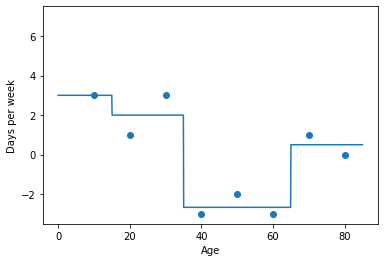

New residuals: [array([ 3.,  1.,  3., -3., -2., -3.,  1.,  0.]), array([ 0.6       , -0.6       ,  1.4       , -0.86666667,  0.13333333,
       -0.86666667,  0.6       , -0.4       ])]

**************************************************

Weak learner 2
Residuals to predict: [ 0.6        -0.6         1.4        -0.86666667  0.13333333 -0.86666667
  0.6        -0.4       ]
Predictions: [ 0.          0.          1.4        -0.53333333 -0.53333333 -0.53333333
  0.1         0.1       ]


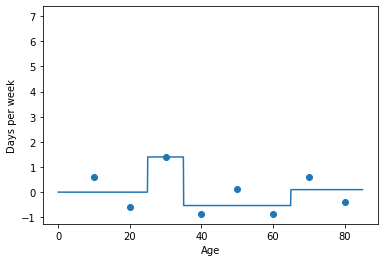

New residuals: [array([ 3.,  1.,  3., -3., -2., -3.,  1.,  0.]), array([ 0.6       , -0.6       ,  1.4       , -0.86666667,  0.13333333,
       -0.86666667,  0.6       , -0.4       ]), array([ 0.6 , -0.6 ,  0.28, -0.44,  0.56, -0.44,  0.52, -0.48])]

**************************************************

Weak learner 3
Residuals to predict: [ 0.6  -0.6   0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [ 6.00000000e-01 -6.00000000e-01 -7.40148683e-17 -7.40148683e-17
 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17]


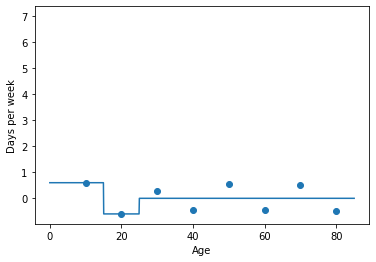

New residuals: [array([ 3.,  1.,  3., -3., -2., -3.,  1.,  0.]), array([ 0.6       , -0.6       ,  1.4       , -0.86666667,  0.13333333,
       -0.86666667,  0.6       , -0.4       ]), array([ 0.6 , -0.6 ,  0.28, -0.44,  0.56, -0.44,  0.52, -0.48]), array([ 0.12, -0.12,  0.28, -0.44,  0.56, -0.44,  0.52, -0.48])]

**************************************************

Weak learner 4
Residuals to predict: [ 0.12 -0.12  0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [-0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667
  0.52       -0.48      ]


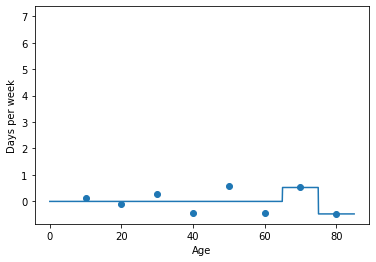

New residuals: [array([ 3.,  1.,  3., -3., -2., -3.,  1.,  0.]), array([ 0.6       , -0.6       ,  1.4       , -0.86666667,  0.13333333,
       -0.86666667,  0.6       , -0.4       ]), array([ 0.6 , -0.6 ,  0.28, -0.44,  0.56, -0.44,  0.52, -0.48]), array([ 0.12, -0.12,  0.28, -0.44,  0.56, -0.44,  0.52, -0.48]), array([ 0.12533333, -0.11466667,  0.28533333, -0.43466667,  0.56533333,
       -0.43466667,  0.104     , -0.096     ])]


In [13]:
predictions_estimators = []
predictions = np.zeros(8)
centered_labels = labels - labels.mean()
residuals = [centered_labels]

for estimator in range(len(gradient_boosting_regressor.estimators_)):
  weak_learner = gradient_boosting_regressor.estimators_[estimator][0]
  print("\n"+"*"*50+"\n")
  print("Weak learner", estimator+1)
  preds = weak_learner.predict(features)
  predictions_estimators.append(preds)
  print("Residuals to predict:", residuals[-1])
  print("Predictions:", preds)
  predictions += preds * 0.8
  plt.scatter(features, labels, color="white")
  utils.plot_regressor(weak_learner, features, residuals[-1])
  plt.show()
  residuals.append(centered_labels - predictions)
  print("New residuals:", residuals)

Finally, we can use Scikit-Learn or a manual calculation to see that the predictions are the following:

Up to weak learner number 1


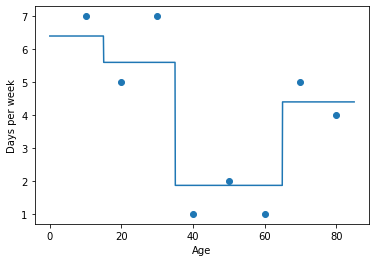

Up to weak learner number 2


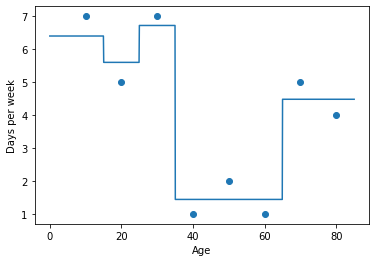

Up to weak learner number 3


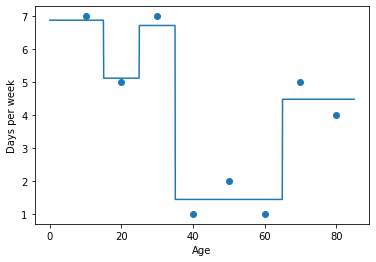

Up to weak learner number 4


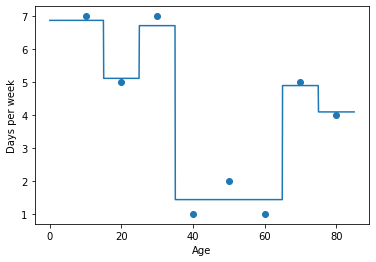

In [14]:
for i in range(1, 5):
  print(f"Up to weak learner number {i}")
  gb_intermediate = GradientBoostingRegressor(max_depth=2, n_estimators=i, learning_rate=0.8)
  gb_intermediate.fit(features, labels)
  predictions = gb_intermediate.predict(features)
  utils.plot_regressor(gb_intermediate, features, labels)

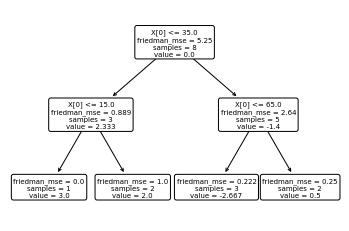

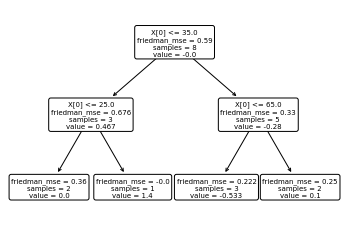

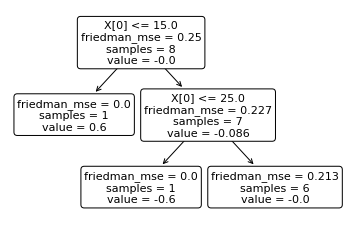

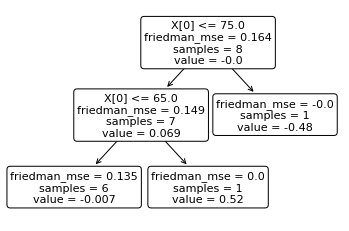

In [15]:
for tree in gradient_boosting_regressor.estimators_:
  sklearn.tree.plot_tree(tree[0], rounded=True)
  plt.show()

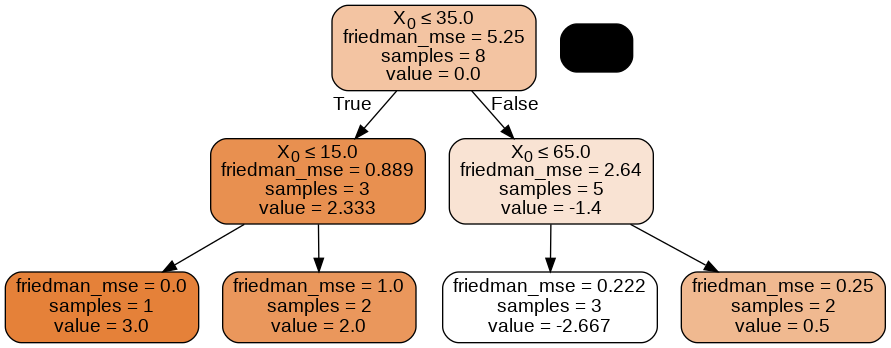

In [16]:
utils.display_tree(gradient_boosting_regressor.estimators_[0][0])

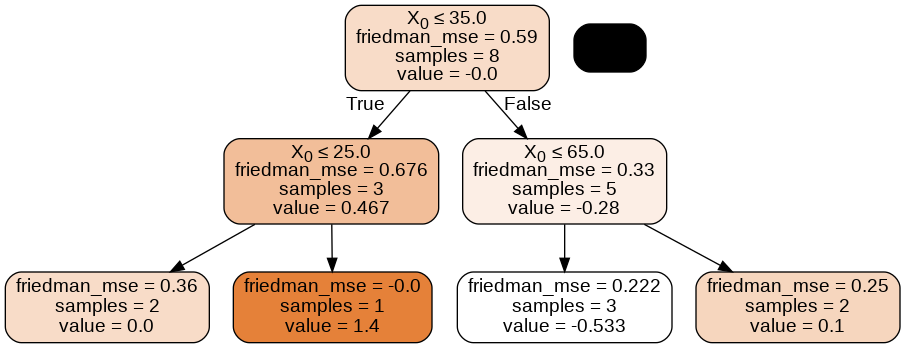

In [17]:
utils.display_tree(gradient_boosting_regressor.estimators_[1][0])

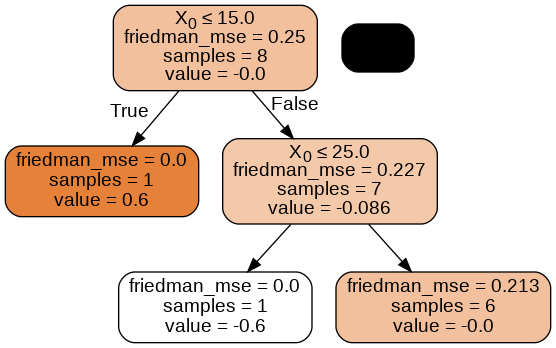

In [18]:
utils.display_tree(gradient_boosting_regressor.estimators_[2][0])

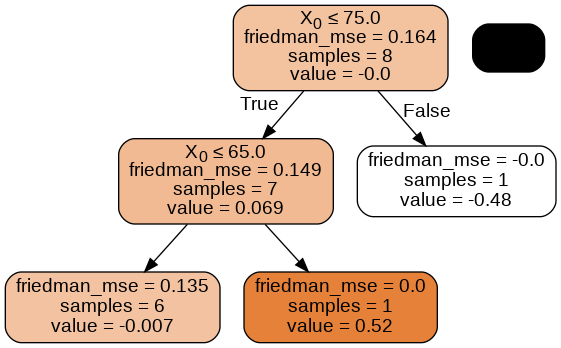

In [19]:
utils.display_tree(gradient_boosting_regressor.estimators_[3][0])

In [28]:
for i in range(1, 10):
  gb_intermediate = GradientBoostingRegressor(max_depth=2, n_estimators=i, learning_rate=0.8)
  gb_intermediate.fit(features, labels)
  predictions = gb_intermediate.predict(features)
  print(f"Age: {max(labels)}, prediction: {max(predictions)}")

Age: 7, prediction: 6.4
Age: 7, prediction: 6.72
Age: 7, prediction: 6.88
Age: 7, prediction: 6.874666666666666
Age: 7, prediction: 6.846933333333333
Age: 7, prediction: 6.937386666666667
Age: 7, prediction: 6.974677333333333
Age: 7, prediction: 6.97547282962963
Age: 7, prediction: 6.972316254814815
